<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.1

# Data

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [28]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

# Loading Dataset

Read titanic dataset.

In [3]:
# Read Titanic Dataset
titanic_csv = 'titanic_train.csv'
titanic = pd.read_csv(titanic_csv)

# Explore Dataset

## Head

In [4]:
# Check Head
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Tail

In [5]:
# Check Tail
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Shape

Find shape of dataset.

In [7]:
# ANSWER
titanic.shape

(891, 12)

## Check Types of Data

Check types of data you have

In [8]:
# ANSWER
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Check Null Values

Check whether dataset have any null values.

In [9]:
# ANSWER
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Check titanic data again
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fill Null Values

Is there any null values in any columns?

- Identify those columns
- Fill those null values using your own logic
    - State your logic behind every step

### Age

In [10]:
# ANSWER
titanic[titanic['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


### Cabin

In [11]:
# ANSWER
titanic[titanic['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Embarked

In [12]:
# ANSWER
titanic[titanic['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# Describe

Describe your dataset.

In [13]:
# ANSWER
titanic.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

In [15]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)

    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

## Pclass

Use the `bar_charts` function above to view the relationship between survived and pclass.  Note your findings.

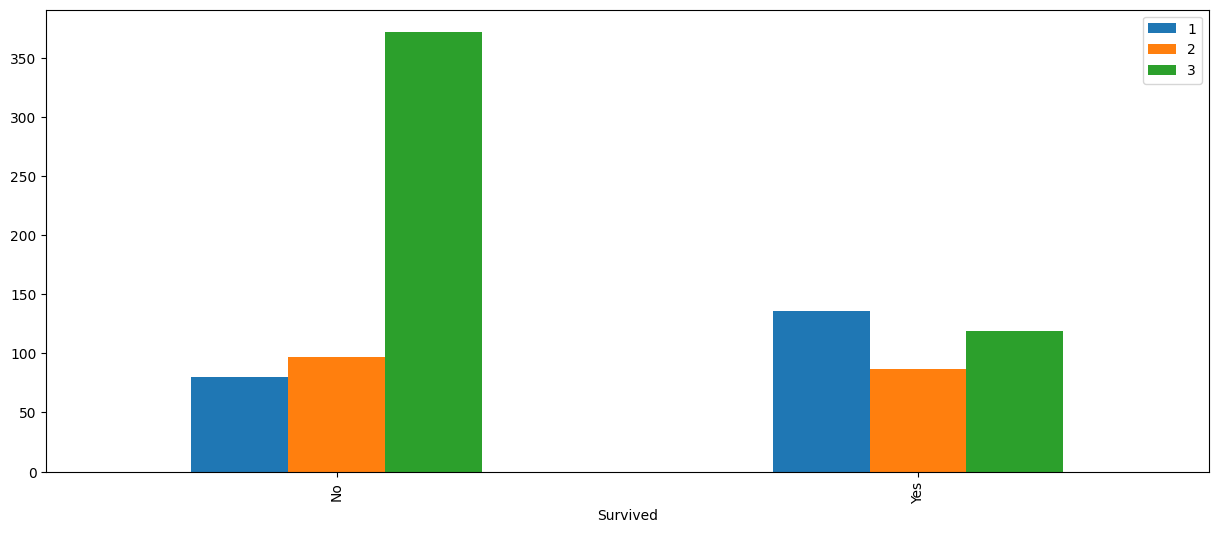

In [16]:
# ANSWER
bar_charts(titanic, 'Pclass')

In [ ]:
If the passenger was in first class ('Pclass1'), their chance of survival was higher than that of the lower classes. 

## Sex

Use `bar_charts` to view the relationship between survived and sex.  Note your findings.

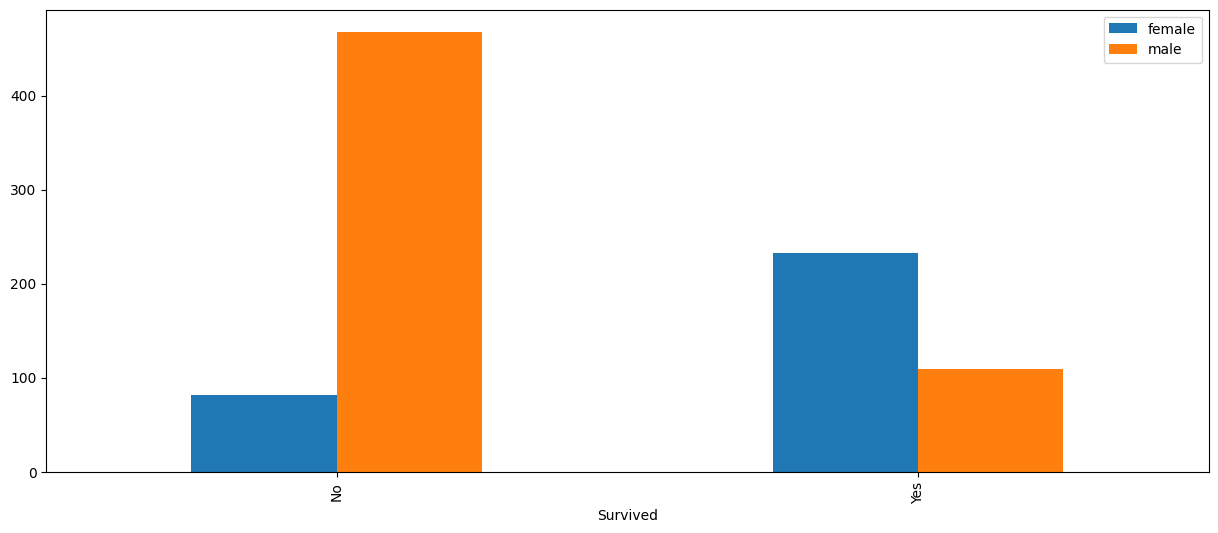

In [17]:
# ANSWER
bar_charts(titanic, 'Sex')

In [ ]:
More female passengers survived than male.

## Parch

Parch = Number of parents and children travelling with each passenger. Use `bar_charts` to view the relationship between survived and Parch.

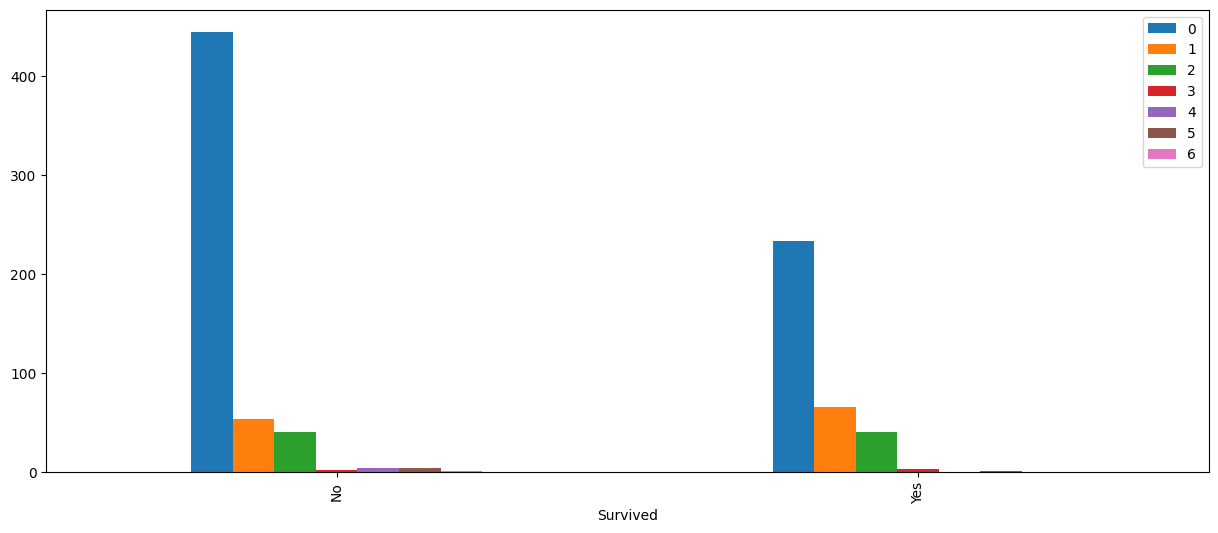

In [18]:
# ANSWER
bar_charts(titanic, 'Parch')

In [ ]:
Passengers traveling with childen had a higher survial rate than those without

## SibSp

SibSp = Number of siblings and spouses travelling with each passenger. Use `bar_charts` to view the relationship between survived and SibSp.

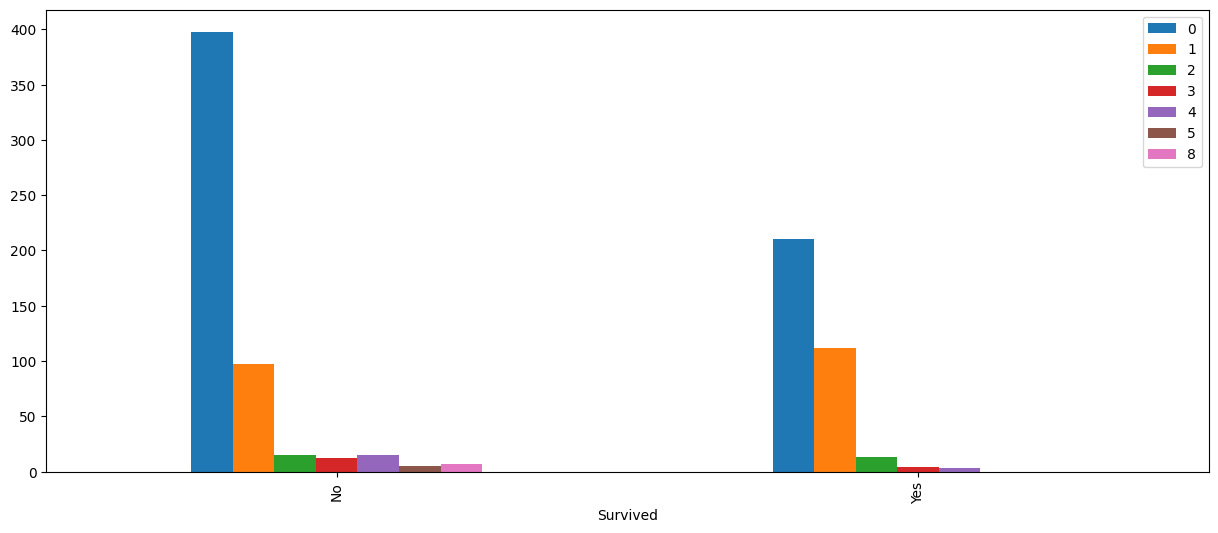

In [20]:
# ANSWER
bar_charts(titanic, 'SibSp')

## Embarked

Do the same for the Embarked variable.

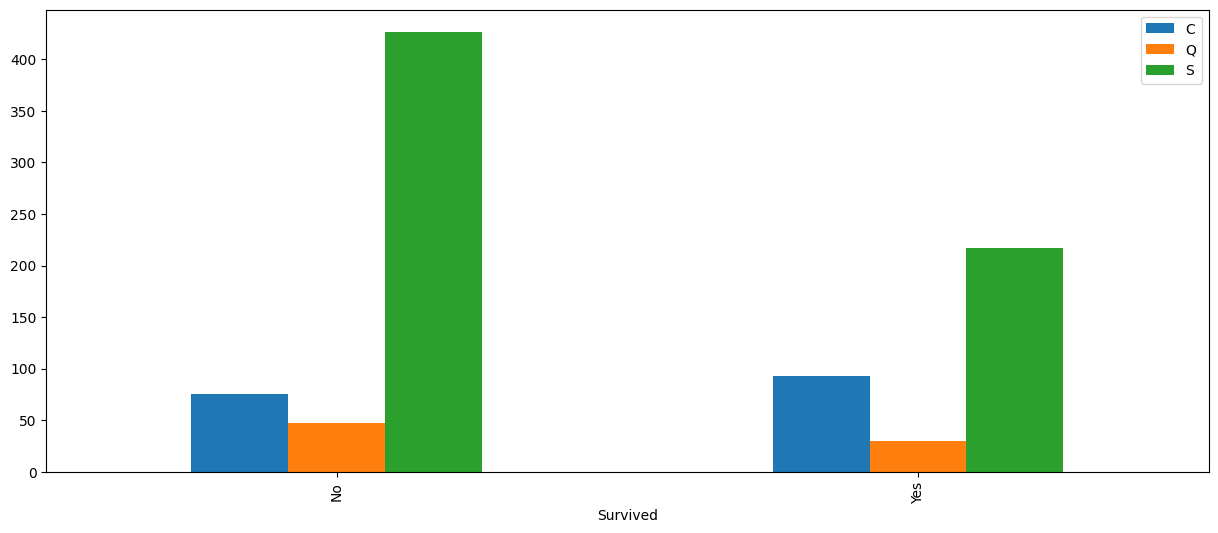

In [21]:
# ANSWER
bar_charts(titanic, 'Embarked')

# Feature Engineering

We shall create some new features from the existing features.

## Fare Class

Create a new column 'Fare class' based on their fare as defined below. Is there any relationship between fare and survival?

In [22]:
def create_fare_class(x):
    if x > 30:
        fare_class = 1
    elif x > 20 and x <= 30:
        fare_class = 2
    elif x > 10 and x <= 20:
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

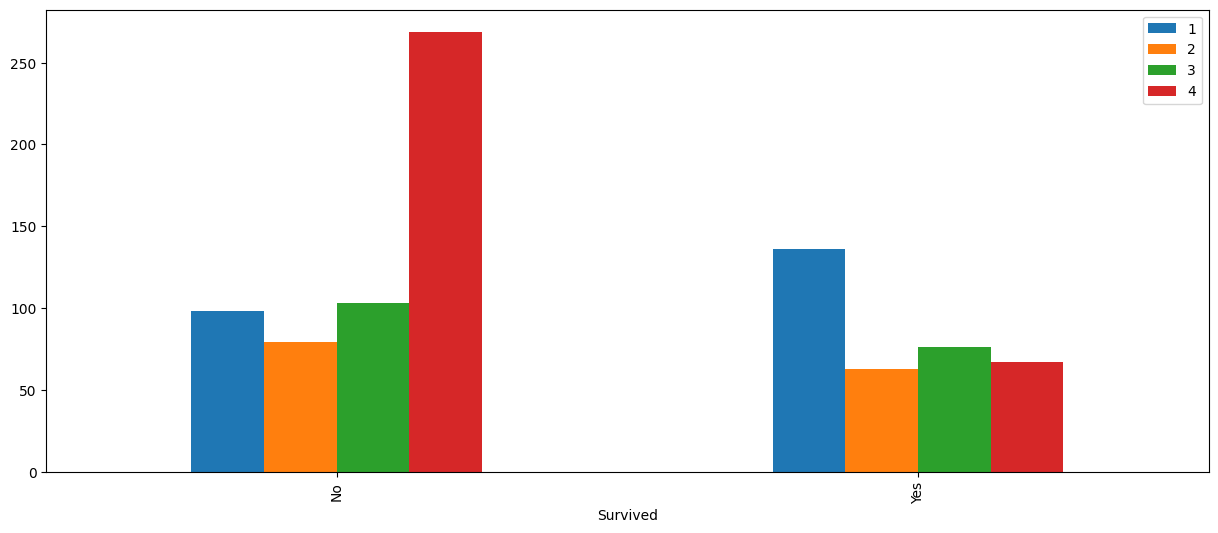

In [24]:
titanic['FareClass'] = titanic['Fare'].apply(create_fare_class)
bar_charts(titanic, 'FareClass')

In [ ]:
# ANSWER
Passengers that paid more money to embark were more likely thos survive that those who didn't. 

## Age Class

Similarly, create a new column 'Age class' based on their age as defined below.

In [ ]:
titanic['Age'].value_counts()

In [25]:
def create_age_class(x):
    if x > 60:
        age_class = 5
    elif x > 35 and x <= 60:
        age_class = 4
    elif x > 25 and x <= 35:
        age_class = 3
    elif x > 16 and x <= 25:
        age_class = 2
    else:
        age_class = 1
    return age_class

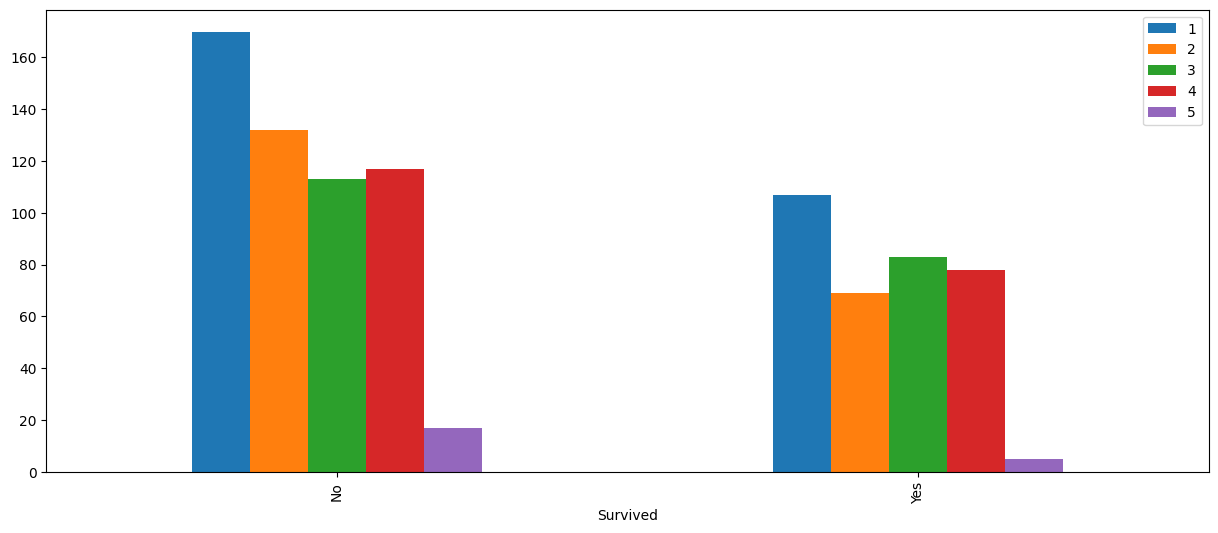

In [26]:
# ANSWER
titanic['AgeClass'] = titanic['Age'].apply(create_age_class)
bar_charts(titanic, 'AgeClass')

# Statistical Overview

## Correlation

Find correlation between `survived` and other features.

In [30]:
# ANSWER

correlation_matrix = titanic.corr(numeric_only=True)
print(correlation_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   
FareClass       0.003258 -0.307600  0.719670 -0.122591 -0.380692 -0.387100   
AgeClass        0.035025  0.005863 -0.352017  0.937647 -0.201286 -0.054464   

                 Fare  FareClass  AgeClass  
PassengerId  0.012658   0.003258  0.035025  
Survived     0.257307  -0.307600  0.005863  
Pclass      -0.549500   0.719670 -0.352017  
Age          0.096067  -0.122591  0.937

# [BONUS] Hypothesis Testing
---
The usual process of null hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the p-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the p-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group.

Collect two sets of data, one with passengers who survived and another one with passengers who died (call them `titanic_survived` and `titanic_died`). The sample sizes should ideally be the same but they can be different. Let's say that the sample sizes are 100.

In [ ]:
N=100
# ANSWER



In [ ]:
a = titanic_survived['Age']
b = titanic_died['Age']

### Set alpha (let alpha = 0.05)


In [ ]:
# ANSWER



### Calculate test statistic

> Here we identify a test statistic that can be used to assess the truth of the null hypothesis.

In [ ]:
## Calculate the variance to get the standard deviation
var_a = a.var(ddof = 1)
var_b = b.var(ddof = 1)

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

In [ ]:
## Calculate the t-statistic
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

### Find the p-value

> Next we compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [ ]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t
if (t > 0):
    p = 2*(1 - stats.t.cdf(t, df = df))
else:
    p = 2*stats.t.cdf(t, df = df)

In [ ]:
print("t = " + str(t))
print("p = " + str(p))

### Interpret results

> The p-value is compared to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, then the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [ ]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    else:
        print("We fail to reject our null hypothesis.")

In [ ]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



